# **--------------- IYKRA ASSIGNTMENT BASIC DATA ANALYSIS ------------------**

You’ve landed a great job with the Ritz-Jager Hotel operator as a data scientist. This hotel operator wants to improve their business efficiency by utilizing their historical data and they want to find out what happened in their previous bookings, knowing their customer better, and optimizing the promo timing.

Your team of engineer have to analyze the data that they have based on the pre-defined questions that your CEO gave.

Questions:
1. Where do the guests come from?
2. How much do guests pay for a room per night?
3. How does the price per night vary over the year?
4. Which are the busiest months?
5. How long do people stay at the hotels?
6. Bookings by market segment
7. How many bookings were cancelled?
8. Which month has the highest number of cancellations? 

In [1]:
#Imort libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import squarify

In [2]:
#Load The Data
data = pd.read_csv(r"D:\Backup\Data Science\IYKRA\Tugas\Dataset\Ritz_Jager_Data.csv").drop_duplicates()
data.head()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


## 1. Where do the guests come from?

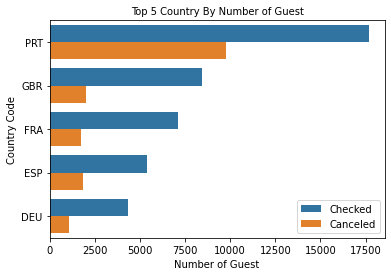

In [3]:
#Top 5 Country by Number of Guest
sns.countplot(y="country_origin", hue="is_canceled", data=data, order=data.country_origin.value_counts().iloc[:5].index)
plt.title('Top 5 Country By Number of Guest', fontsize=10)
plt.xlabel('Number of Guest', fontsize=10)
plt.ylabel('Country Code', fontsize=10)
plt.legend(["Checked", "Canceled"],loc='lower right')
plt.show()

## 2. How much do guests pay for a room per night?

In [4]:
data.adr.describe()

count    87396.000000
mean       106.337246
std         55.013953
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max       5400.000000
Name: adr, dtype: float64

## 3. How does the price per night vary over the year?

In [5]:
#Change Data Type From String to Date
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"],format='%d/%m/%Y')

In [6]:
#Make reservation_status_date as Index
data_new = data.copy()
data_new.set_index("reservation_status_date", inplace = True) 

In [7]:
#Group By Day
data_new = data_new[(data_new["is_canceled"] == 0)] #Just the checke one and there is a day rate
data_new = data_new.resample('D').median().dropna() #Drop the nan values
data_new.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
reservation_status_date,,,,,,,,,,,,,,,,,,,,
2015-07-02,0.0,4.0,2015.0,27.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,204.0,0.0,88.20,0.0,0.0
2015-07-10,0.0,92.0,2015.0,28.0,6.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,135.0,0.0,96.49,0.0,1.0
2015-07-13,0.0,84.0,2015.0,28.0,8.0,1.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,156.0,113.0,0.0,89.68,0.0,0.0
2015-07-15,0.0,33.0,2015.0,28.0,11.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,204.0,0.0,107.00,0.0,1.0
2015-07-20,0.0,25.0,2015.0,29.0,17.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,240.0,240.0,0.0,118.50,0.0,0.0


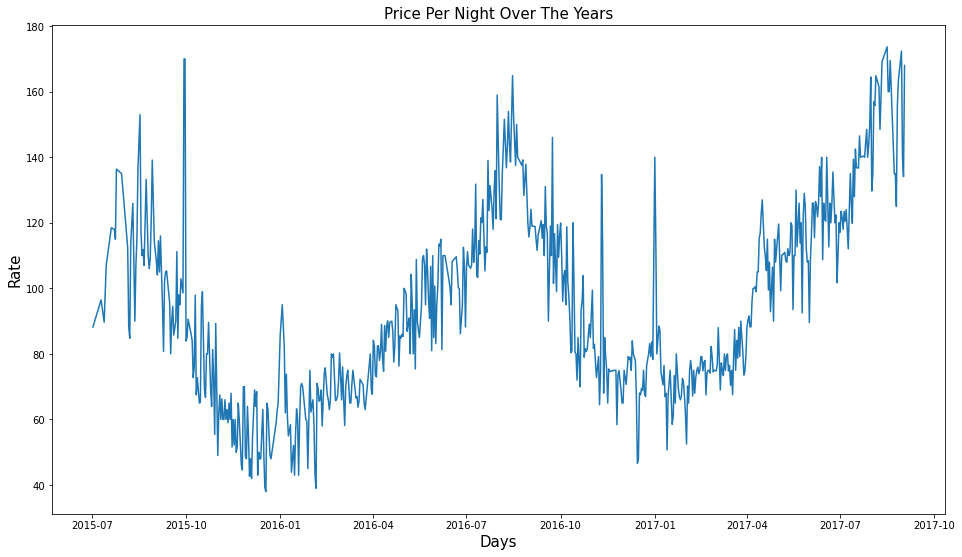

In [8]:
#Visualization
plt.figure(figsize=(16,9))
plt.plot(data_new.index, data_new.adr)
plt.title('Price Per Night Over The Years', fontsize= 15)
plt.xlabel('Days', fontsize= 15)
plt.ylabel('Rate', fontsize= 15)
plt.show()

## 4. Which are the busiest months?

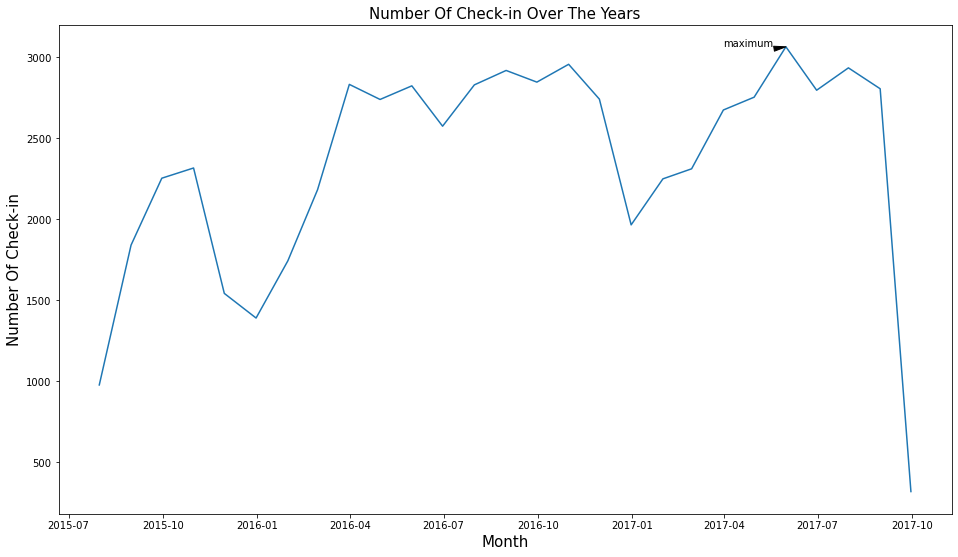

In [57]:
#Group By Mounth
data_m = data.copy()
data_m.set_index("reservation_status_date", inplace = True) 
data_m = data_m[(data_m["is_canceled"] == 0)]
data_m['is_checkedin'] = data_m["is_canceled"] + 1
data_m = data_m.resample('M').sum()

#Visualization
plt.figure(figsize=(16,9))
plt.plot(data_m.index, data_m.is_checkedin)
plt.title('Number Of Check-in Over The Years', fontsize= 15)
plt.xlabel('Month', fontsize= 15)
plt.ylabel('Number Of Check-in', fontsize= 15)
arrow_properties = dict(facecolor="black", width=5,headwidth=5, shrink=1)
plt.annotate("maximum", 
             xy=(data_m.is_checkedin.sort_values(ascending=False).index[0], data_m.is_checkedin.max()),
             xytext=(data_m.is_checkedin.index[-7], data_m.is_checkedin.max()),
             arrowprops=arrow_properties)
plt.show()

## 5. How long do people stay at the hotels?

In [10]:
#Reset Index
data = data.reset_index()

#Choose Relevan Columns
data_n = data[(data["is_canceled"] == 0)] #Just input the one who checked in
data_n = data_n[["arrival_date_year", "arrival_date_month","arrival_date_day_of_month" ,"reservation_status_date" ]]

In [11]:
#Change Data Type arrival_date_year to Datetime
data_n['date_checkin'] = data[['arrival_date_day_of_month', 'arrival_date_month', 'arrival_date_year']].astype(str).apply(lambda x: '/'.join(x), axis=1)
data_n['date_checkin'] = pd.to_datetime(data_n["date_checkin"], format='%d/%B/%Y')

#Make A Calculation About Day Spent
data_n["day_spent"] = data_n['reservation_status_date'] - data_n['date_checkin']

In [12]:
#Summary Statistics Of Day Spent Guests
data_n.day_spent.describe()

count                     63371
mean     3 days 11:38:03.637626
std      2 days 16:33:32.549088
min             0 days 00:00:00
25%             2 days 00:00:00
50%             3 days 00:00:00
75%             4 days 00:00:00
max            69 days 00:00:00
Name: day_spent, dtype: object

## 6. Bookings by market segment

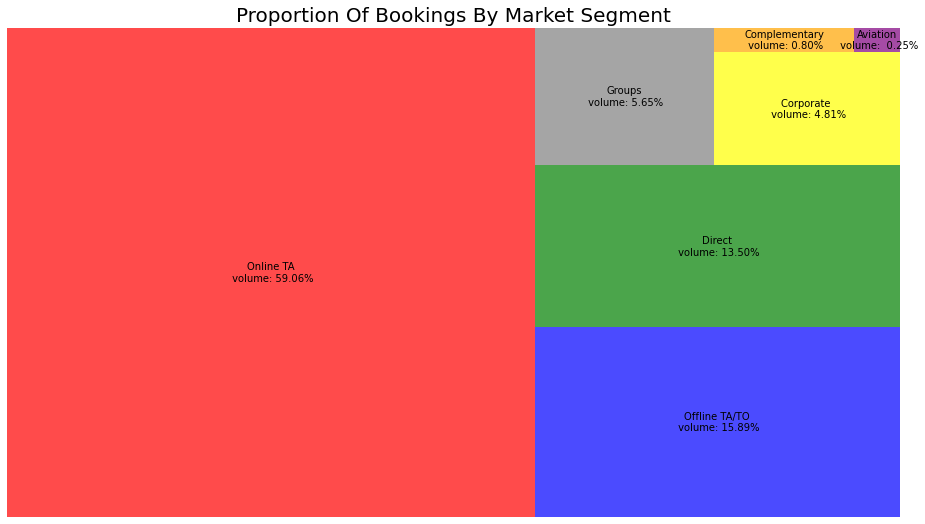

In [13]:
#Visualization Booking By Segment
plt.figure(figsize=(16,9))
sizes = [51618, 13889, 11804, 4942, 4212, 702, 227] #i didnt insert the undefined category
labels = ['Online TA\n volume: 59.06%',
          'Offline TA/TO\n volume: 15.89%',
          'Direct\n volume: 13.50%',
          'Groups\n volume: 5.65%',
          'Corporate \n volume: 4.81%',
          'Complementary\n volume: 0.80%',
          'Aviation\n volume:  0.25%']
color=['red','blue','green','grey', 'yellow', 'orange', 'purple']
squarify.plot(sizes=sizes, label=labels,color=color, alpha=0.7 )
plt.axis('off')
plt.title('Proportion Of Bookings By Market Segment', fontsize= 20)
plt.show()

## 7. How many bookings were cancelled?

In [14]:
#Bookings were canceled
print("Total bookings were cancelled is:", data.is_canceled.value_counts()[1] )

Total bookings were cancelled is: 24025


In [63]:
#Proportion of canceled bookings
print("Percentation of cancelled bookings from total bookings:", round(data.is_canceled.value_counts()[1]/ len(data),2) * 100, '%')

Percentation of cancelled bookings from total bookings: 27.0 %


## 8. Which month has the highest number of cancellations? 

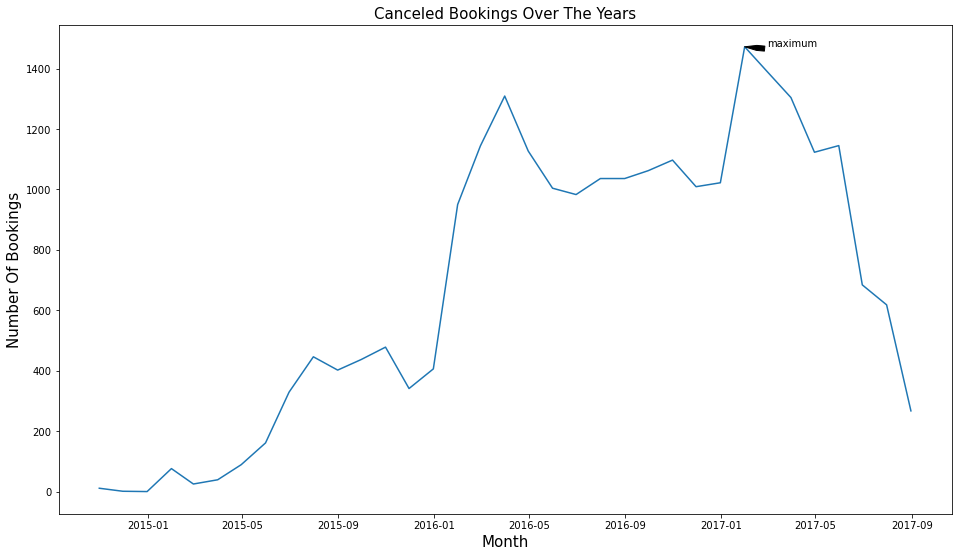

In [65]:
#Group By Mounth
data_x = data.copy()
data_x.set_index("reservation_status_date", inplace = True) 
data_x = data_x[(data_x["is_canceled"] == 1)]
data_x = data_x.resample('M').sum()

#Visualization
plt.figure(figsize=(16,9))
plt.plot(data_x.index, data_x.is_canceled)
plt.title('Canceled Bookings Over The Years', fontsize= 15)
plt.xlabel('Month', fontsize= 15)
plt.ylabel('Number Of Bookings', fontsize= 15)
arrow_properties = dict(facecolor="black", width=5,headwidth=5, shrink=1)
plt.annotate("maximum", 
             xy=(data_x.is_canceled.sort_values(ascending=False).index[0], data_x.is_canceled.max()),
             xytext=(data_x.is_canceled.index[-7], data_x.is_canceled.max()),
             arrowprops=arrow_properties)
plt.show()